# SVD/PCA
## Ahmed Ben Saad

In [227]:
fn1 = "Ahmed"
ln1 = "Ben Saad"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD204_lab2", ln1, fn1])) + ".ipynb"
filename

'sd204_lab2_ben saad_ahmed.ipynb'

In [228]:
import numpy as np
import time
from math import *
import matplotlib.pyplot as plt

## Exercise 1:

### 1)

In [229]:
lam = 1e-5


def verif(n, p):
    In = np.eye(n)
    Ip = np.eye(p)
    X = np.random.normal(0, 5, (n, p))
    Xt = np.transpose(X)
    Y = np.random.uniform(-1, 1, (n, 1))
    A = np.dot(np.dot(np.dot(Xt, X) + lam * Ip, Xt), Y)
    B = np.dot(np.dot(Xt, np.dot(X, Xt) + lam * In), Y)
    return(np.allclose(A, B))

In [230]:
verif(100, 2000)

True

In [231]:
verif(2000, 100)

True

### 2)

In [232]:
def ridgeTester(n, p):
    X = np.random.normal(0, 5, (n, p))
    Xt = np.transpose(X)
    Y = np.random.uniform(-1, 1, (n, 1))

    t1 = time.clock()
    Ip = np.eye(p)
    A = np.dot(np.dot(np.dot(Xt, X) + lam * Ip, Xt), Y)
    t2 = time.clock()
    T_n = t2 - t1

    t3 = time.clock()
    In = np.eye(n)
    B = np.dot(np.dot(Xt, np.dot(X, Xt) + lam * In), Y)
    t4 = time.clock()
    T_p = t4 - t3

    print("for n=", n, "and p=", p)
    print("eclapsed time for computing the left-hand side of (1): ", T_n)
    print("eclapsed time for computing the right-hand side of (1): ", T_p)

In [233]:
ridgeTester(100, 2000)

('for n=', 100, 'and p=', 2000)
('eclapsed time for computing the left-hand side of (1): ', 0.1752819999996973)
('eclapsed time for computing the right-hand side of (1): ', 0.005428999999821826)


In [234]:
ridgeTester(2000, 100)

('for n=', 2000, 'and p=', 100)
('eclapsed time for computing the left-hand side of (1): ', 0.004159999999956199)
('eclapsed time for computing the right-hand side of (1): ', 0.21143399999982648)


<b> As seen, the equality (1) holds true in a very precise way (1e-5). <br>
 In order to calculate the ridge estimator, we can use either of them depending on wether $n\ll p$ or $n\gg p$. <br>
 When $n\ll p$ it is more time efficient to use the left-hand side. <br>
 When $n\gg p$ we should use the right-hand one. </b>

## Exercise 2:

### 1)

In [235]:
def generate(n, p):
    t = (n, p)
    X1 = np.random.uniform(-sqrt(6), sqrt(6), t)
    X2 = np.random.exponential(sqrt(2), t) - sqrt(2)
    X3 = np.random.gamma(2, 1, t) - 2
    return(X1, X2, X3)

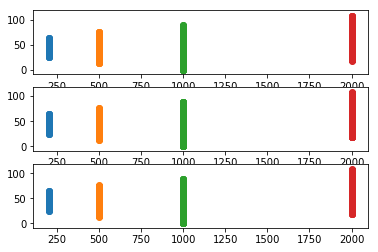

In [236]:
P = [200, 500, 1000, 2000]
n = 1000
for p in P:
    X1, X2, X3 = generate(n, p)
    S1 = np.linalg.svd(X1, compute_uv=0)
    S2 = np.linalg.svd(X2, compute_uv=0)
    S3 = np.linalg.svd(X3, compute_uv=0)
    plt.figure(1)
    plt.subplot(311)
    plt.scatter([p] * len(S1), S1)
    plt.subplot(312)
    plt.scatter([p] * len(S2), S2)
    plt.subplot(313)
    plt.scatter([p] * len(S3), S3)

plt.show()

### 3)

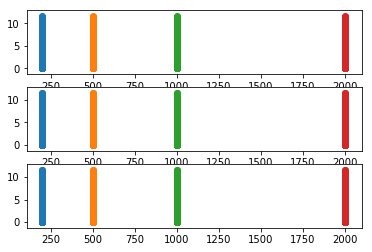

In [237]:
for p in P:
    L1, V1 = np.linalg.eig(0.001 * np.dot(np.transpose(X1), X1))
    L2, V2 = np.linalg.eig(0.001 * np.dot(np.transpose(X2), X2))
    L3, V3 = np.linalg.eig(0.001 * np.dot(np.transpose(X3), X3))
    plt.figure(1)
    plt.subplot(311)
    plt.scatter([p] * len(L1), L1)
    plt.subplot(312)
    plt.scatter([p] * len(L2), L2)
    plt.subplot(313)
    plt.scatter([p] * len(L3), L3)

plt.show()

## Exercise 3:
### 1)

In [247]:
X = np.random.normal(0, 5, (100, 2000))

In [239]:
def power_method(X, niter, V):
    Xt = np.transpose(X)
    for i in range(niter):
        U = np.dot(X, V)
        V = np.dot(Xt, U)
        U = 1. / (np.linalg.norm(U)) * U
        V = 1. / (np.linalg.norm(V)) * V
    return(U, V)

### 2)

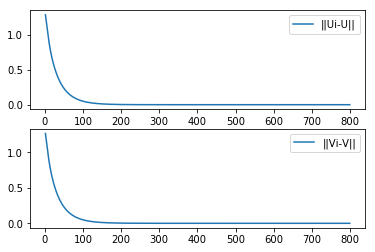

In [248]:
    niter = 800
    Ui = np.ones((100, 1))
    Vi = np.ones((2000, 1))
    Xt = np.transpose(X)
    L = [i + 1 for i in range(niter)]
    U1, S1, V1 = np.linalg.svd(X)
    U = U1[:, 0]
    # we took U et V as the left singular vector and the right singular vector
    V = V1[0]
    LU = []
    LV = []
    for i in range(niter):
        Ui = np.dot(X, Vi)
        Vi = np.dot(Xt, Ui)
        Ui = (1. / (np.linalg.norm(Ui))) * Ui
        Vi = (1. / (np.linalg.norm(Vi))) * Vi
        n1 = np.linalg.norm(U - np.transpose((Ui)))
        n2 = np.linalg.norm(V - np.transpose(Vi))
        LU.append(n1)
        LV.append(n2)
    plt.figure(2)
    plt.subplot(211)
    plt.plot(L, LU, label="||Ui-U||")
    plt.legend()
    plt.subplot(212)
    plt.plot(L, LV, '', label="||Vi-V||")
    plt.legend()
    plt.show()

### 3)

In [249]:
V01 = np.ones((2000, 1))
V02 = -V01
U1, V1 = power_method(X, 800, V01)
U2, V2 = power_method(X, 800, V02)
print(np.linalg.norm(V1 - V2))
print(np.linalg.norm(U1 - U2))

# When U1=-U2 and V1=-V2 both sets don't converge to the same vectors (they converge to the opposite set of vectors)

2.0
2.0


### 4)

In [250]:
U, V = power_method(X, 800, V01)
sigma = np.linalg.norm(Xt.dot(U))
sigma2 = np.linalg.norm(X.dot(V))


print("||XtU||=", sigma)
print("||XV||= ", sigma2)
print("largest singular value computed with np.linalg.svd: ", S1[0])

('||XtU||=', 272.52420992819515)
('||XV||= ', 272.52420992819515)
('largest singular value computed with np.linalg.svd: ', 272.52420992819515)


### 5)

In [251]:
U, V = power_method(X, 800, V01)
Mu = np.zeros((2000, 100))
Mv = np.zeros((2000, 2000))
V.resize(2000, 2000)
U.resize((2000, 100))
U = np.transpose(U)
X1 = X - S1[0] * np.dot(U, V)
U1, V1 = power_method(X1, 800, V01)
print("Value computed with the method above: ", np.linalg.norm(X1.dot(V1)))
print("Second largest singular value computed with np.linalg.svd: ", S1[1])

('Value computed with the method above: ', 268.62622979887152)
('Second largest singular value computed with np.linalg.svd: ', 268.62622980118897)


## Exercise 4:

### 1)

In [252]:
import pandas as pd

In [253]:
df = pd.read_csv(
    "http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv", ';')

### 2)

In [254]:
from sklearn import preprocessing

In [255]:
df_scaled = preprocessing.scale(
    df[['England', 'Wales', 'Scotland', 'N Ireland']])
df_scaled = df_scaled.T

### 3)

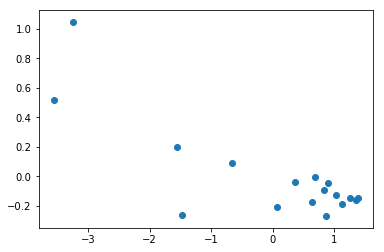

In [256]:
u, s, v = np.linalg.svd(df_scaled)
plt.scatter(np.dot(df_scaled.T, u[0]), np.dot(df_scaled.T, u[1]))
plt.show()

### 4)

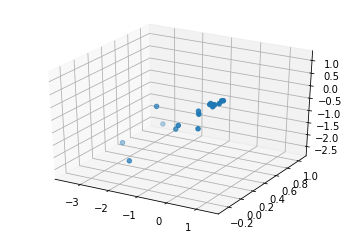

In [257]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.dot(df_scaled.T, u[0]), np.dot(
    df_scaled.T, u[1]), np.dot(df_scaled.T, u[2]))
plt.show()

### 5)

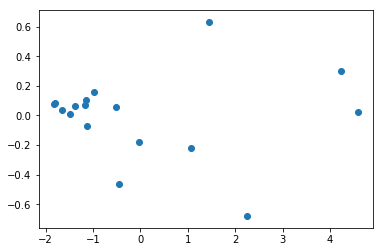

In [258]:
# (a)
t1 = time.clock()

XXt = np.dot(df_scaled, np.transpose(df_scaled))
# diagonalization
eigenValues, eigenVectors = np.linalg.eig(XXt)
# sort
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

t2 = time.clock()
# plot 2D
plt.scatter(np.dot(df_scaled.T, eigenVectors[:, 0]), np.dot(
    df_scaled.T, eigenVectors[:, 1]))
plt.show()

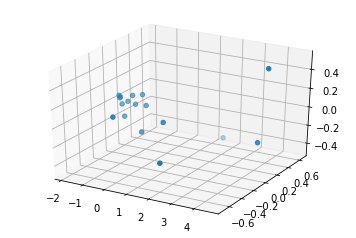

In [259]:
# plot 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.dot(df_scaled.T, eigenVectors[:, 0]), np.dot(
    df_scaled.T, eigenVectors[:, 1]), np.dot(df_scaled.T, eigenVectors[:, 2]))
plt.show()

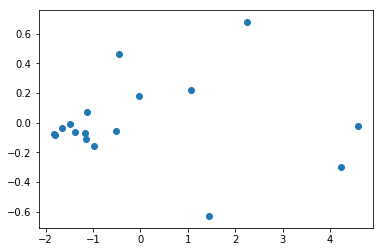

In [260]:
# (b)
from sklearn.decomposition import TruncatedSVD
t3 = time.clock()
truncSVD = TruncatedSVD(3)
df1 = truncSVD.fit_transform(df_scaled.T)
t4 = time.clock()
# plot 2D
plt.scatter(df1[:, 0], df1[:, 1])
plt.show()

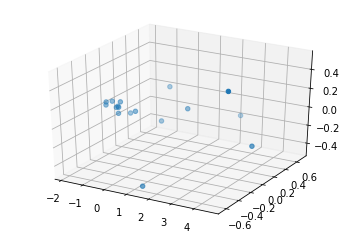

In [261]:
# plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1[:, 0], df1[:, 1], df1[:, 2])
plt.show()

In [262]:
# Evaluating time
delta_t_eigen = t2 - t1
delta_t_svd = t4 - t3
print "eclapsed time with eigenVectors method: ", delta_t_eigen
print "eclapsed time with SVD decomposition method: ", delta_t_svd

eclapsed time with eigenVectors method:  0.00129500000003
eclapsed time with SVD decomposition method:  0.00241899999992


## Exercise 5:

In [319]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

 Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### 1)

<b> This dataset is a set of images associated to famous persons collected in the internet. <br>
There are 1288 samples and 1850 features. features are the images' pixels.</b>

### 2)

In [308]:
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#### a) 

In [336]:
def get_accuracy_PCA(n_components):

    # scaling data

    X_scaled = scale(X)

    # perform PCA as requiered

    pca = PCA(n_components)

    df_PCA = pca.fit_transform(X_scaled)

    # split the dataset into training set and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_PCA, y, test_size=0.3, random_state=777)

    # logistic regression
    logreg = linear_model.LogisticRegression(random_state=5)
    logreg.fit(X_train, Y_train)

    # compute the accuracy
    accuracy = logreg.score(X_test, Y_test)
    return accuracy

In [337]:
print "accuracy using PCA with an explained variance of 95%: ", get_accuracy_PCA(0.95)

accuracy using PCA with an explained variance of 95%:  0.793281653747


#### b)

In [338]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [339]:
from sklearn.model_selection import cross_val_score

In [340]:
def find_best_n_components():
    pipe = Pipeline([('pca', pca), ('regmod', logreg)])
    # number of CVs to be performed (fixed at 10 in the beginning but changed to 3 for less computing time)
    K = 3

    pred_error = [0 for i in range(150)]
    pred_error_means = [0 for i in range(150)]
    # limiting the tested n_components due to execution time
    n_values = [121 + 2 * i for i in range(10)]
    k = 0
    for i in n_values:
        k += 1
        pred_error[i] = cross_val_score(pipe.set_params(
            pca__n_components=i), X, y, cv=K, scoring="neg_mean_squared_error")
        pred_error_means[i] = np.mean(pred_error[i])
        print k, "out of 10"

    best_n_components = np.argsort(pred_error_means)[0]
    print "best value for number of components for PCA with 10 cv: ", best_n_components
    return best_n_components

### Comparison:

In [329]:
best_n_components = find_best_n_components()

1 out of 10
2 out of 10
3 out of 10
4 out of 10
5 out of 10
6 out of 10
7 out of 10
8 out of 10
9 out of 10
10 out of 10
best value for number of components for PCA with 10 cv:  129


In [344]:
print "accuracy using PCA with an explained variance of 95%: ", get_accuracy_PCA(n_components=0.95)
print "accuracy using PCA with cross-validation for number of principal axis: ", get_accuracy_PCA(n_components=best_n_components)

accuracy using PCA with an explained variance of 95%:  0.793281653747
accuracy using PCA with cross-validation for number of principal axis:  0.780361757106


<b>As we can see, the accuracies using PCA with un explained variance of 95% and using cross-validation for determining the number of principal axis are nearly equal. <br> 
This means that these criterias for our PCA are equivalent. <br>
Note that the second method takes too much time compared to the first. As I'm not sure wether my implementation is optimal, I cannot say that the first method is better</b>